# Phase Diagram
|Author  | Stanley A. Baronett|
|--------|--------------------|
|Created | 3/23/2022          |
|Updated | 3/23/2022          |

## [Beattie (1993)](https://doi.org/10.1007/BF00712982)

![Beattie (1993), Fig. 4](https://github.com/sabaronett/geol-710/blob/main/img/Beattie_1993_Fig_4.png?raw=1)
> **Fig. 4.** Phase diagram for the system $\mathrm{Mg}_2\mathrm{Si}\mathrm{O}_4-\mathrm{Fe}_2\mathrm{Si}\mathrm{O}_4$.
The *solid lines* represent the phase diagram calculated using Eqs. 10 and 12 for the forsterite component, *dotted lines* are the phase diagram as calculated by Ghiorso et al.(1983), assuming that the melt phase is a regular solution.
The circles are experimentally determined values (Bowen and Schairer 1935);
the solidus and liquidus compositions are represented by *solid* and *hollow* circles respectively.
Bowen and Schairer estimated the errors to be $\pm4^\circ\,\mathrm{C}$ for all but the $1890^\circ\,\mathrm{C}$ experiment.
It is clear that neither model reproduces the binary exactly, but the equations developed here do reproduce the shape of the phase diagram.
Temperatures in $^\circ\,\mathrm{C}$

\begin{equation}
  T^\mathrm{Ol}=\frac{\Delta H_M^\mathrm{Ol}/R+(P-10^5)\Delta V_M^\mathrm{Ol}/R}{\Delta S_M^\mathrm{Ol}/R+2\ln D_{M*}^{\mathrm{Ol}/L}+2\ln1.5C_{NM*}^L+2\ln3C_{\mathrm{SiO}_2*}^L-(NF)},
\tag{10}
\end{equation}
where $(NF)=7/2\ln(1-C_{\mathrm{AlO}_{1.5*}}^L)+7\ln(1-C_{\mathrm{TiO}_{2*}}^L)$.


\begin{equation}
  D_\mathrm{Mg*}^{\alpha/L}=\frac{\psi^\alpha-\sum\limits_{M=1}^nB_M^\alpha C_\mathrm{MO*}^L}{\sum\limits_{M=1}^nA_M^\alpha C_\mathrm{MO*}^L},
\tag{12}
\end{equation}
where $\psi^\alpha$ is the molar proportion of cations in the mineral, $\alpha$, which are located in the $m$ site (0.666 for olivine).

- 1st Tab1 w/ Eq13
- Tab3 w/ Eq10 @1atm (to cancel ΔV)
- end members will have same T for solid olivine & liquid melt

In [2]:
import matplotlib.pyplot as plt
import numpy as np

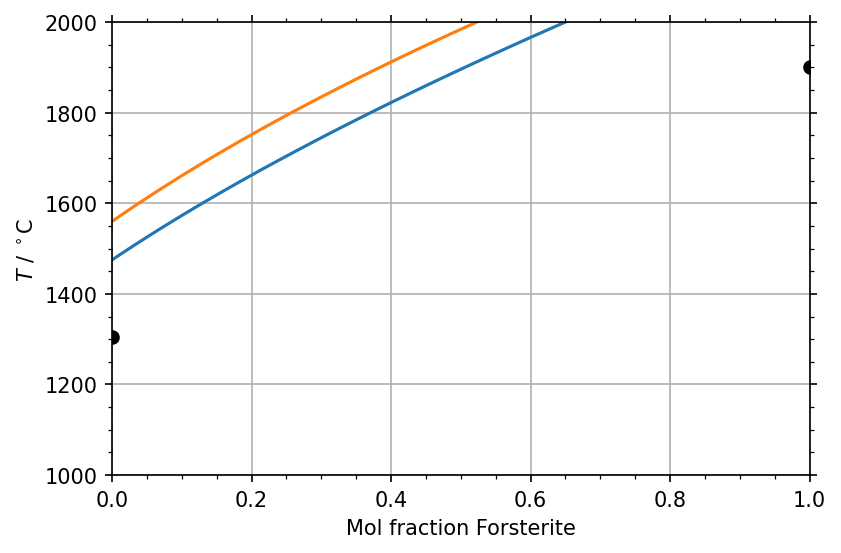

In [16]:
# Physical constants, conversions
R = 8.31446261815324            # gas constant [J/K/mol] or [m³Pa/K/mol]
KtoC = -273.15                  # absolute zero in (deg) C

# Table 1. Empirical constants for Eqs. 12 and 13
A_Mg, B_Mg = 1.000, 0.000
A_Fe, B_Fe = 0.299, 0.027
psi = 2/3                       # molar proportion of cations in olivine

# Table 2. Thermodynamic parameters for olivine components in silicate melts
DH_Mg, DH_Fe = 113.1e3, 109.9e3 # [J/mol]
DS_Mg, DS_Fe = 52.05,   69.60   # [J/K/mol]

# Endmember cases
Fo1 = 1                         # 100% Forsterite (Mg)   
Fo0 = 0                         #   0% Forsterite (Fayalite, Fe)
C_Mg = np.linspace(0, 1, 100)   # molar concentration of Forsterite

# Eq. 12
numerSum = B_Mg*C_Mg + B_Fe*(1-C_Mg)
denomSum = A_Mg*C_Mg + A_Fe*(1-C_Mg)
D_Mg = (psi-numerSum)/denomSum
D_M_Mg = A_Mg*D_Mg+B_Mg
D_M_Fe = A_Fe*D_Mg+B_Fe

# Eq. 10
T0 = DH_Fe/DS_Fe                # Fo0
T1 = DH_Mg/DS_Mg                # Fo1
Ts_Mg = (DH_Mg/R)/(DS_Mg/R+2*np.log(D_M_Mg))

# Plot
fig, ax = plt.subplots(dpi=150)
ax.plot(Fo0, T0+KtoC, 'ko')
ax.plot(Fo1, T1+KtoC, 'ko')
ax.plot(C_Mg, Ts_Mg+KtoC)
ax.plot(C_Mg, Ts_Fe+KtoC)
ax.grid()
ax.minorticks_on()
ax.set(xlabel='Mol fraction Forsterite', ylabel=r'$T$ / $^\circ\mathrm{C}$',
       xlim=(0, 1), ylim=(1000, 2000))
ax.tick_params(axis='both', which='both', top=True, right=True)

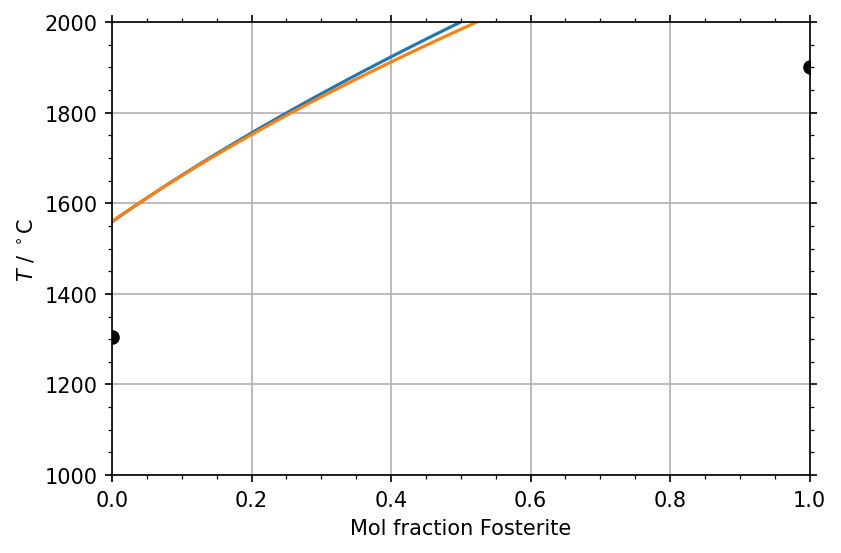

In [14]:
fig, ax = plt.subplots(dpi=150)

# Physical constants, conversions
R = 8.31446261815324            # gas constant [J/K/mol] or [m³Pa/K/mol]
KtoC = -273.15                  # absolute zero in (deg) C

# Endmember cases
Fo1 = 1                         # 100% Forsterite (Mg)   
Fo0 = 0                         #   0% Forsterite (Fayalite, Fe)
C_Mg = np.linspace(0, 1, 100)   # molar concentration of Forsterite

# Table 1. Empirical constants for Eqs. 12 and 13
A_Mg, B_Mg = 1.000, 0.000
A_Fe, B_Fe = 0.299, 0.027
psi = 2/3                       # molar proportion of cations in olivine

# Eq. 12
numerSum = B_Mg*C_Mg + B_Fe*(1-C_Mg)
denomSum = A_Mg*C_Mg + A_Fe*(1-C_Mg)
D_Mg = (psi-numerSum)/denomSum
D_M_Mg = A_Mg*D_Mg+B_Mg
D_M_Fe = A_Fe*D_Mg+B_Fe

# Table 2. Thermodynamic parameters for olivine components in silicate melts
DH_Mg, DH_Fe = 113.1e3, 109.9e3 # [J/mol]
DS_Mg, DS_Fe = 52.05,   69.60   # [J/K/mol]
# DV_Mg, DV_Fe = 4.11,    4.02  # [cm³/mol]

# Eq. 10
C_NM = 2/3
C_SiO2 = 1/3
NF = 0
# P = 101325 # 1 atm [Pa]
# Endmember cases
T1 = DH_Mg/DS_Mg
T0 = DH_Fe/DS_Fe
Ts_Mg = (DH_Mg/R+(P-1e5)*DV_Mg/R)\
        /(DS_Mg/R+2*np.log(D_M_Mg)+2*np.log(1.5*C_NM)+2*np.log(3*C_SiO2)-NF)
Ts_Fe = (DH_Fe/R+(P-1e5)*DV_Fe/R)\
     /(DS_Fe/R+2*np.log(D_M_Fe)+2*np.log(1.5*C_NM)+2*np.log(3*C_SiO2)-NF)

ax.plot(Fo1, T1+KtoC, 'ko')
ax.plot(Fo0, T0+KtoC, 'ko')
ax.plot(C_Mg, Ts_Mg+KtoC)
ax.plot(C_Mg, Ts_Fe+KtoC)
ax.grid()
ax.minorticks_on()
ax.set(xlabel='Mol fraction Fosterite', ylabel=r'$T$ / $^\circ\mathrm{C}$',
       xlim=(0, 1), ylim=(1000, 2000))
ax.tick_params(axis='both', which='both', top=True, right=True)